In [0]:
import TensorFlow

Importing Python, and hooking it into the notebook environment

In [2]:
import Python
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [0]:
// Create a XORModel Struct
struct XORModel: Layer
{
  // define three layers, each of Dense type
  var inputLayer = Dense<Float>(inputSize: 2, outputSize: 2, activation: sigmoid)
  var hiddenLayer = Dense<Float>(inputSize: 2, outputSize: 2, activation: sigmoid)
  var outputLayer = Dense<Float>(inputSize: 2, outputSize: 1, activation: sigmoid)
  
  // procide the differentiable thingo
  @differentiable func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float>
  {
    return input.sequenced(through: inputLayer, hiddenLayer, outputLayer)
  }
}

In [0]:
// create an instance of our XORModel Struct (defined above)
var model = XORModel()

// create an optimizer (standard gradient descent)
let optimizer = SGD(for: model, learningRate: 0.02)

// create some training data
let trainingData: Tensor<Float> = [[0, 0], [0, 1], [1, 0], [1, 1]]

// label the training data (so we know the correct outputs)
let trainingLabels: Tensor<Float> = [[0], [1], [1], [0]]

In [0]:
var losses: [Float] = []

In [6]:
for epoch in 0 ..< 100_000
{
    // do the ting
    let 𝛁model = model.gradient { model -> Tensor<Float> in
        let ŷ = model(trainingData)
        let loss = meanSquaredError(predicted: ŷ, expected: trainingLabels)
        if epoch % 5000 == 0
        {
          print("epoch: \(epoch) loss: \(loss)")
        }
        losses.append(loss.scalarized())
        return loss
    }
    optimizer.update(&model, along: 𝛁model)
}

epoch: 0 loss: 0.25017095
epoch: 5000 loss: 0.24968345
epoch: 10000 loss: 0.24945173
epoch: 15000 loss: 0.249071
epoch: 20000 loss: 0.24838872
epoch: 25000 loss: 0.24707231
epoch: 30000 loss: 0.24431644
epoch: 35000 loss: 0.23789153
epoch: 40000 loss: 0.22249581
epoch: 45000 loss: 0.19924848
epoch: 50000 loss: 0.18366006
epoch: 55000 loss: 0.17458816
epoch: 60000 loss: 0.16486104
epoch: 65000 loss: 0.14299597
epoch: 70000 loss: 0.074409775
epoch: 75000 loss: 0.028045619
epoch: 80000 loss: 0.014047721
epoch: 85000 loss: 0.008686855
epoch: 90000 loss: 0.006071343
epoch: 95000 loss: 0.004578938


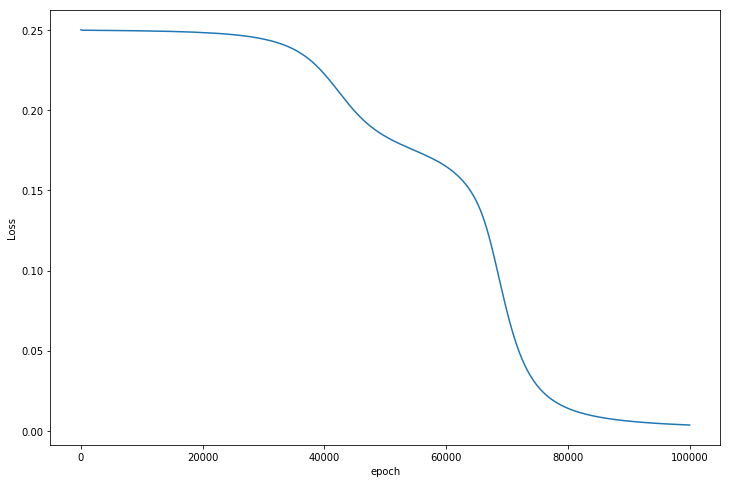

None


In [7]:


let plot = Python.import("matplotlib.pyplot")
plot.figure(figsize: [12, 8])

plot.ylabel("Loss")
plot.xlabel("epoch")
plot.plot(losses)

plot.show()

In [8]:
print(round(model.inferring(from: [[0, 0], [0, 1], [1, 0], [1, 1]])))

[[0.0],
 [1.0],
 [1.0],
 [0.0]]
